In [4]:
import pandas as pd
df  = pd.read_csv("F:/PARKINSON/parkinsons/parkinsons_updrs.data")
print(df.head())
print(df.columns)
print(df.info())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [7]:
X = df.drop(columns = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS'])
y = df['total_UPDRS']
print("Feature shape :",X.shape)
print("Target shape :",y.shape)


Feature shape : (5875, 16)
Target shape : (5875,)


In [11]:
from sklearn.model_selection import train_test_split
x_train,  x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred,)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
print(results_df)

                       MAE       RMSE        R2
LinearRegression  8.295591  10.096644  0.080052
Ridge             8.296943  10.099779  0.079481
Lasso             8.424121  10.342286  0.034745
SVR               7.521216   9.700467  0.150830
RandomForest      6.529722   8.453741  0.355078
GradientBoosting  7.384198   9.146753  0.245007


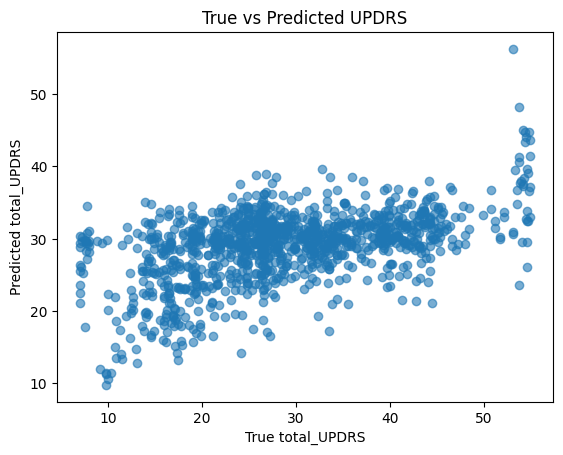

In [21]:
import matplotlib.pyplot as plt

#best_model = RandomForestRegressor(n_estimators=100, random_state=42)
#best_model = Lasso()
#best_model = LinearRegression()
#best_model = Ridge()
#best_model = SVR()
best_model = GradientBoostingRegressor(random_state=42)


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", best_model)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("True vs Predicted UPDRS")
plt.show()